In [2]:
#import libraries 
import matplotlib.pyplot as plt
import numpy as np

import skimage.io
from skimage.color import rgb2hsv
from skimage.exposure import equalize_adapthist

import cv2

import os

from rembg.bg import remove
import io
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# print(os.listdir("rice_leaf_diseases"))


In [3]:
#path folder penyakit
ori_blb_path = "rice_leaf_diseases/train/bacterial_leaf_blight/"
ori_bs_path = "rice_leaf_diseases/train/brown_spot/"
ori_ls_path = "rice_leaf_diseases/train/leaf_smut/"

# path setelah color balanced
cb_blb_path = "rld_img_cb/blb/"
cb_bs_path = "rld_img_cb/bs/"
cb_ls_path = "rld_img_cb/ls/"

# path setelah histogram equalization
heq_blb_path = "rld_img_hequal/blb/"
heq_bs_path = "rld_img_hequal/bs/"
heq_ls_path = "rld_img_hequal/ls/"

# path setelah rembg
r_blb_path = "rld_img_rembg/blb/"
r_bs_path = "rld_img_rembg/bs/"
r_ls_path = "rld_img_rembg/ls/"

In [4]:
import colorcorrect.algorithm as cca
from colorcorrect.util import from_pil, to_pil

img_test = Image.open(ori_blb_path + '/' + "DSC_0365.JPG")
# to_pil(cca.max_white(from_pil(img_test))).show()

def colorBalance(image, name, path):
    """
    Implement cca.max_white color correction algorithm 
      using colorcorrect library
    Args:
        image: image object that will be color balanced
        name: filename of the saved color balanced image
        path: color balanced image destination folder
    Returns: 
    """

    to_pil(cca.max_white(from_pil(image))).save(path + name)


# colorBalance(img_test, "DSC_0365.JPG", cb_blb_path)


In [12]:
# # image color balancing
# blb_os_path = os.listdir(ori_blb_path)
# for img_name in blb_os_path[:]:
#     read_img = Image.open(ori_blb_path + img_name)
#     colorBalance(read_img, img_name, cb_blb_path)

# bs_os_path = os.listdir(ori_bs_path)
# for img_name in bs_os_path[:]:
#     read_img = Image.open(ori_bs_path + img_name)
#     colorBalance(read_img, img_name, cb_bs_path)

# ls_os_path = os.listdir(ori_ls_path)
# for img_name in ls_os_path[:]:
#     read_img = Image.open(ori_ls_path + img_name)
#     colorBalance(read_img, img_name, cb_ls_path)

In [7]:
# histogram equalization based on https://www.etutorialspoint.com/index.php/311-python-opencv-histogram-equalization


def equalize_hist(image):
    """
    Image enhancement using histogram equalization discrete function 
    Args:
        path_img_input: path of the input image folder directory in string
        path_save: destination path of equalized background image 
    Returns: 
        hist_eq: image after histogram equalization
    """

    #convert to YUV 
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # apply equalization histogram
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return hist_eq


# blb_os_path = os.listdir(cb_blb_path)
# for img_name in blb_os_path[:]:
#     read_img = cv2.imread(cb_blb_path + img_name)

#     hist_eq = equalize_hist(read_img)

#     cv2.imwrite(heq_blb_path + img_name, hist_eq)


bs_os_path = os.listdir(cb_bs_path)
for img_name in bs_os_path[:]:
    read_img = cv2.imread(cb_bs_path + img_name)
    hist_eq = equalize_hist(read_img)

    cv2.imwrite(heq_bs_path + img_name, hist_eq)

ls_os_path = os.listdir(cb_ls_path)
for img_name in ls_os_path[:]:
    read_img = cv2.imread(cb_ls_path + img_name)
    hist_eq = equalize_hist(read_img)

    cv2.imwrite(heq_ls_path + img_name, hist_eq)

In [9]:
def preprocessedImage(img_path, rmv_bg_img_path):
    """
    Remove background from image using rembg library
    Args:
        img_path: path of the image folder directory in string
        rmv_bg_img_path: destination of removed background path
    Returns: 
    """
    os_path = os.listdir(img_path)
    for img_name in os_path[:]:
        read_img = cv2.imread(img_path + img_name) #read image from path

        r_bg_img = remove(read_img)

        # final_img = cv2.cvtColor(r_bg_img, cv2.COLOR_RGB2BGR)


        cv2.imwrite(rmv_bg_img_path + img_name, r_bg_img)

        
#function display all images
def displayImg(array):
    """
    Display all images from an array
    Args:
        array: array that contains image data type
    Returns: Image displayed using matlotlib
    """
    n = len(array)
    # f = plt.figure()
    for i in range(n):
        plt.figure()
        plt.imshow(array[i])
        plt.show(block = True)


In [14]:
# preprocessedImage(ori_blb_path, r_blb_path)
# preprocessedImage(ori_bs_path, r_bs_path)
# preprocessedImage(ori_ls_path, r_ls_path)

2022-04-09 11:44:16.368251653 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:509 CreateExecutionProviderInstance] Failed to create TensorrtExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/TensorRT-ExecutionProvider.html#requirements to ensure all dependencies are met.
2022-04-09 11:44:16.368409682 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:535 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/reference/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.


KeyboardInterrupt: 

In [ ]:
# def getRGB(event,x,y,flags,param): #(Based from stackoverflow by Wicaledon to get RGB color values from clicked pixel of an image)
#     if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
#         colorsR = image[y,x,2]
#         colorsG = image[y,x,1]
#         colorsB = image[y,x,0]
#         colors = image[y,x]
#         print("RGB Format: ",colors)
#         print("Pixel Coordinates: X: ",x,"Y: ",y)

# image = cv2.imread("rice_leaf_diseases/bacterial_leaf_blight/DSC_0365.jpg")
# cv2.namedWindow('getRGB')
# cv2.setMouseCallback('getRGB',getRGB)

# #Do until esc pressed
# while(1):
#     cv2.imshow('getRGB',image)
#     if cv2.waitKey(20) & 0xFF == 27:
#         break
# #if esc pressed, finish.
# cv2.destroyAllWindows()

Text(0.5, 1.0, 'Value')

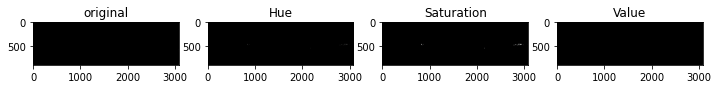

In [26]:
x = cv2.imread("rld_img_rembg/blb/DSC_0701.jpg") #read image from path
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) #convert image color to RGB
leaf_disease_hsv = rgb2hsv(x) #convert RGB image to HSV (Based on from https://mattmaulion.medium.com/color-image-segmentation-image-processing-4a04eca25c0 by Matt Maulion)

# print(x.shape)
fig, ax = plt.subplots(1, 4, figsize=(12,4))
ax[0].imshow(x)
ax[0].set_title('original')
ax[1].imshow(leaf_disease_hsv[:,:,0], cmap='gray')
ax[1].set_title('Hue')
ax[2].imshow(leaf_disease_hsv[:,:,1], cmap='gray')
ax[2].set_title('Saturation')
ax[3].imshow(leaf_disease_hsv[:,:,2], cmap='gray')
ax[3].set_title('Value')


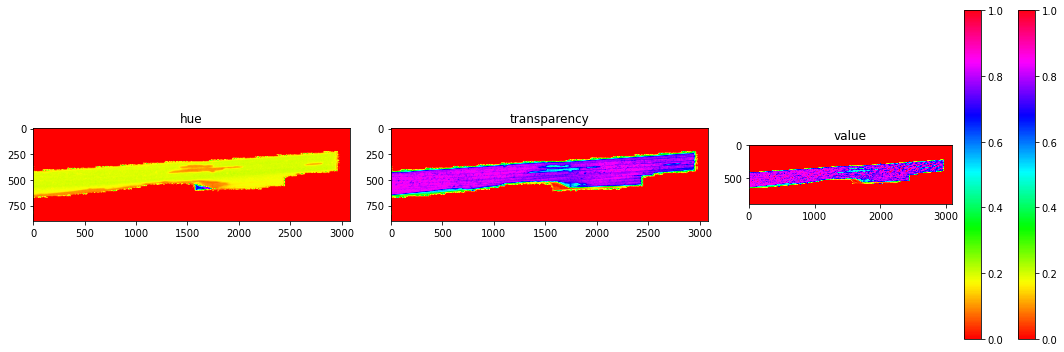

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(leaf_disease_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(leaf_disease_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(leaf_disease_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(skimage.io.imshow(leaf_disease_hsv[:,:,0],cmap='hsv')) 
fig.colorbar(skimage.io.imshow(leaf_disease_hsv[:,:,1],cmap='hsv')) 
# fig.colorbar(imshow(leaf_disease_hsv[:,:,2],cmap='hsv')) 

fig.tight_layout()


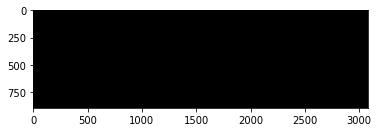

In [17]:
#lower hue 
lower_hue_mask = leaf_disease_hsv[:,:,0] > 0.0
#upper hue
upper_hue_mask = leaf_disease_hsv[:,:,0] < 0.1
#transparensi
lower_saturation_mask = leaf_disease_hsv[:,:,1] > 0.5
upper_saturation_mask = leaf_disease_hsv[:,:,1] < 0.8

 
mask_segment = upper_hue_mask*lower_hue_mask
red = x[:,:,0]*mask_segment
green = x[:,:,1]*mask_segment
blue = x[:,:,2]*mask_segment
bags_masked = np.dstack((red,green,blue))
plt.imshow(bags_masked)


In [117]:
# path mask
m_blb_path = "rld_mask/blb/"
m_bs_path = "rld_mask/bs/"
m_ls_path = "rld_mask/ls/"


def create_hue_segment(path_r, path_m, lower_hue_val, upper_hue_val):
    """
    Create mask of images from path_r and save them to 
        path_m using hue segmentation
    Args:
        path_r: path of the image folder directory in string
        path_m: path of the mask image destination
        lower_hue_val: lowest hue value
        upper_hue_val: highest hue value
    Returns: 
    """
    os_path = os.listdir(path_r)
    for img in os_path[:]:
        read_bgr_img = cv2.imread(path_r + img)
        read_rgb_img = cv2.cvtColor(read_bgr_img, cv2.COLOR_BGR2RGB)
        read_hsv_img = rgb2hsv(read_rgb_img)
        
        # Hue segment
        img_hue = read_hsv_img[:,:,0]
        l_mask = img_hue > lower_hue_val
        u_mask = img_hue < upper_hue_val
        hue_mask = u_mask * l_mask
        
        # red = read_rgb_img[:,:,0] * hue_mask
        # green = read_rgb_img[:,:,1] * hue_mask
        # blue = read_rgb_img[:,:,2] * hue_mask

        # mask = np.dstack((red, green, blue))
        plt.imsave(path_m + img, hue_mask, cmap="gray") 
        

def create_hue_mask_alt(path1, path2, non_target_hue, target_hue):
    """
    Create mask of images from path1 and save them to 
        path2y
    Args:
        path: path of the image folder directory in string
        path2: path of the mask image destination
        non-target-hue: hue value to be removed
        target-hue: targeted hue value 
    Returns: 
    """
    os_path = os.listdir(path1)
    for img in os_path[:]:
        read_img = np.array(Image.open(path1 + img))

        # Hue segment
        img_hue = read_img[:,:,0]
        markers = np.zeros_like(img_hue)
        if non_target_hue != None:
            markers[img_hue < non_target_hue] = 1
        if target_hue != None:
            markers[img_hue > target_hue] = 2
        cmapps = ["gray"]

        for i in range(len(cmapps)):
            plt.imsave(path2 + "/" + img, markers, cmap=str(cmapps[i])) #use colormap


def create_adp_mask(path1, path2, adp_type,  thres_type):
    """
    Create mask of images from path1 and save them to 
        path2y
    Args:
        path: path of the image folder directory in string
        path2: path of the mask image destination
        adp_type: adaptive method 
        thres_type: threshold type
    Returns: 
    """
    os_path = os.listdir(path1)
    for img in os_path[:]:
        read_img = np.array(Image.open(path1 + "/" + img))


        # adapthist thresholding
        img_gray = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=5)
        clahe_img = clahe.apply(img_gray)
        threshG = cv2.adaptiveThreshold(clahe_img, 255, adp_type, thres_type, 199, 18)

        cv2.imwrite(path2 + "/" + img, threshG)

In [127]:
create_hue_segment(r_blb_path, m_blb_path, 0.05, 0.15)
create_hue_segment(r_bs_path, m_bs_path, 0.00, 0.1)
create_hue_segment(r_ls_path, m_ls_path, 0.00, 0.1)

# create_adp_mask(r_bs_path, m_bs_path, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV)
# create_adp_mask(r_ls_path, m_ls_path, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV)


In [125]:
# path segment img
seg_blb_path = "segment_img/blb/"
seg_bs_path = "segment_img/bs/"
seg_ls_path = "segment_img/ls/"

def segment_disease(path_r, path_m, path_res):
    """
    Segment disease from the paddy leaf
    Args:
        path_r: path of the removed background image
        path_m: path of the mask image 
        path_res: destination path of segment image
    Returns: 
    """
    os_path = os.listdir(path_r)
    for img in os_path[:]:
        read_rgb_img = cv2.imread(path_r + img)
        # read_rgb_img = cv2.cvtColor(read_rgb_img)

        hue_mask = cv2.imread(path_m + img)
        # h, s, v = cv2.split(hue_mask)
        # plt.figure()
        # plt.imshow(hue_mask)

     
        # red = read_rgb_img[:,:,0] * hue_mask[:,:,0] * hue_mask[:,:,1] * hue_mask[:,:,2]
        # green = read_rgb_img[:,:,1] * hue_mask[:,:,0]* hue_mask[:,:,1] * hue_mask[:,:,2]
        # blue = read_rgb_img[:,:,2] * hue_mask[:,:,0] * hue_mask[:,:,1] * hue_mask[:,:,2]

        # result = np.dstack((red, green, blue))

        res = cv2.bitwise_and(read_rgb_img, hue_mask)
        cv2.imwrite(path_res + img, res)

In [128]:
segment_disease(r_blb_path, m_blb_path, seg_blb_path)
segment_disease(r_bs_path, m_bs_path, seg_bs_path)
segment_disease(r_ls_path, m_ls_path, seg_ls_path)